In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/ML PRO/bank.csv")

In [ ]:
df.shape

(11162, 17)

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
cat = df.select_dtypes(include=['object']).copy()

In [ ]:
cat_col = cat.columns
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
cat['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [ ]:
cat['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [ ]:
cat['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [ ]:
cat['default'].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [ ]:
cat['housing'].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [ ]:
cat['loan'].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [ ]:
cat['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [ ]:
cat['month'].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [ ]:
cat['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [ ]:
cat['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

Job


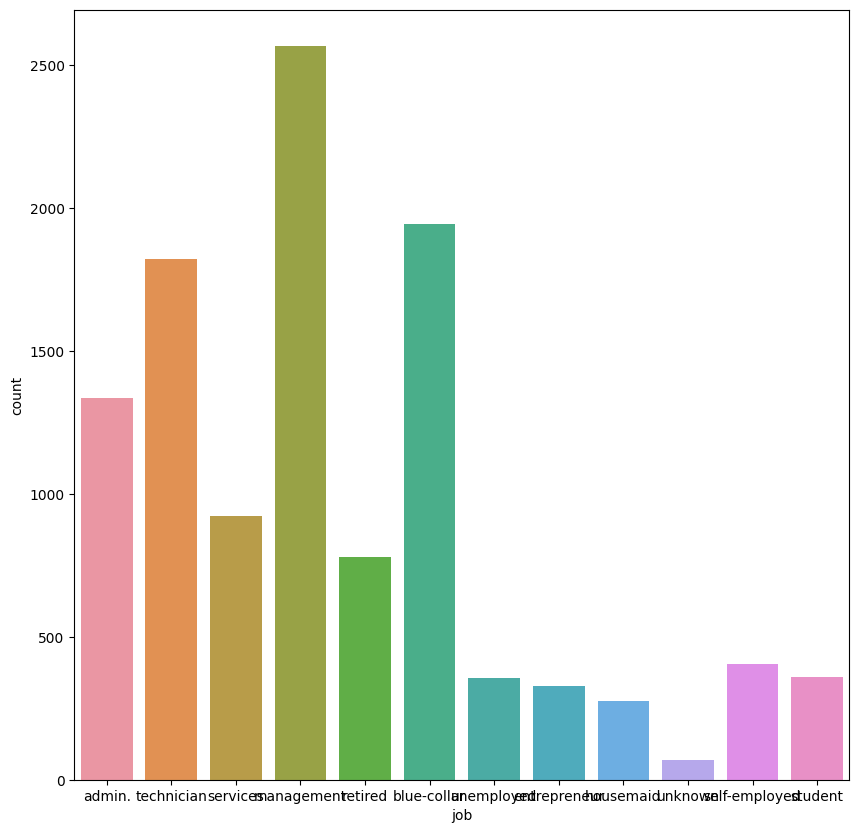

Marital


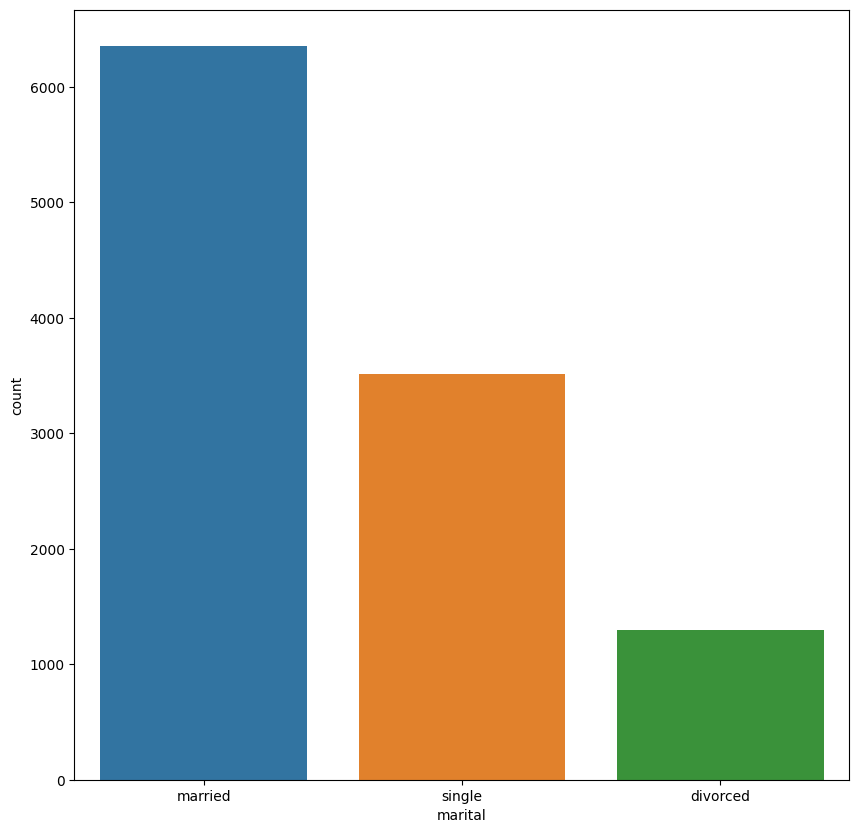

Education


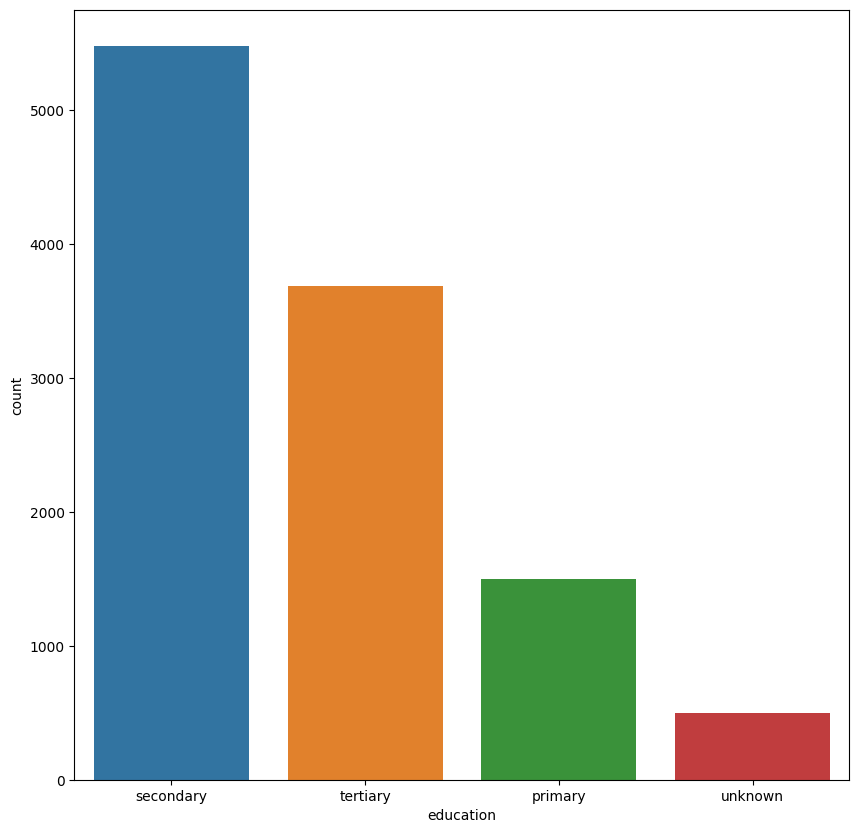

Default


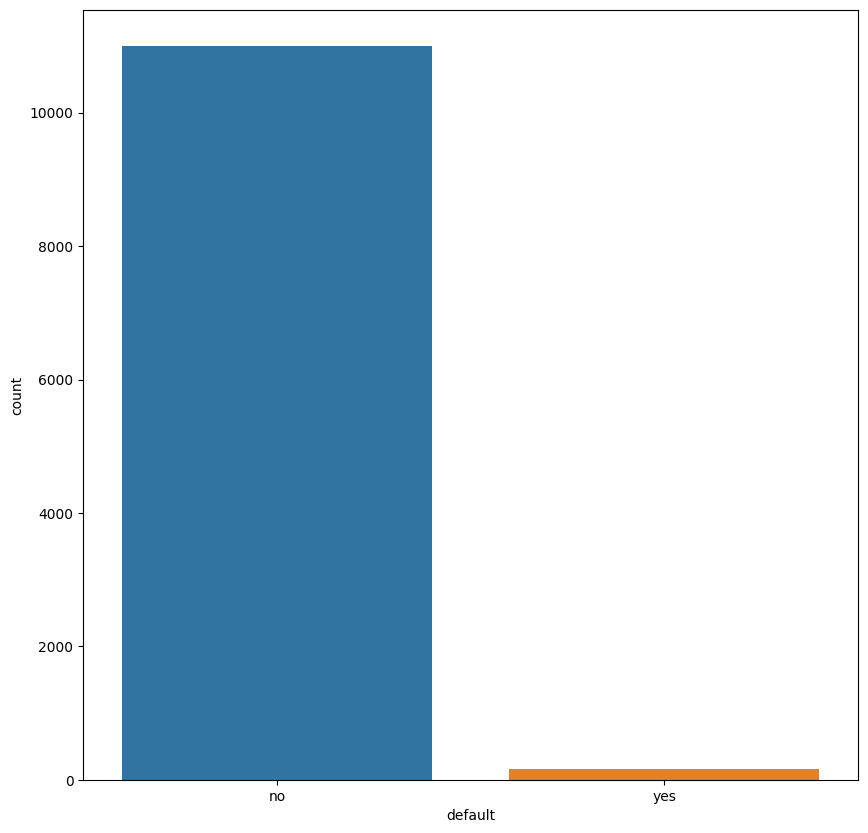

Housing


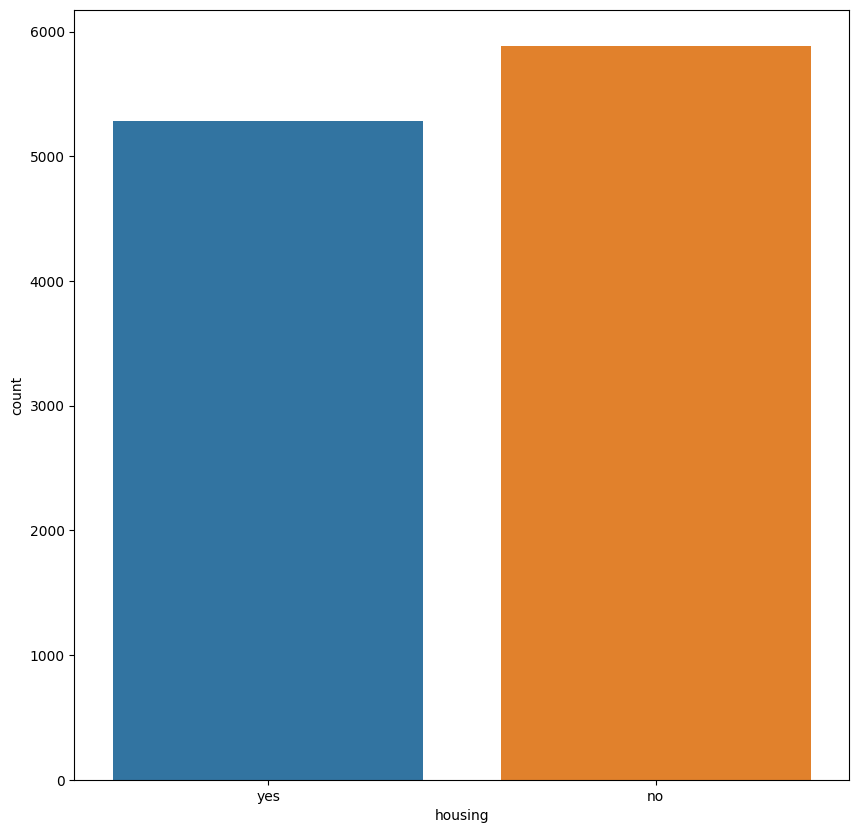

Loan


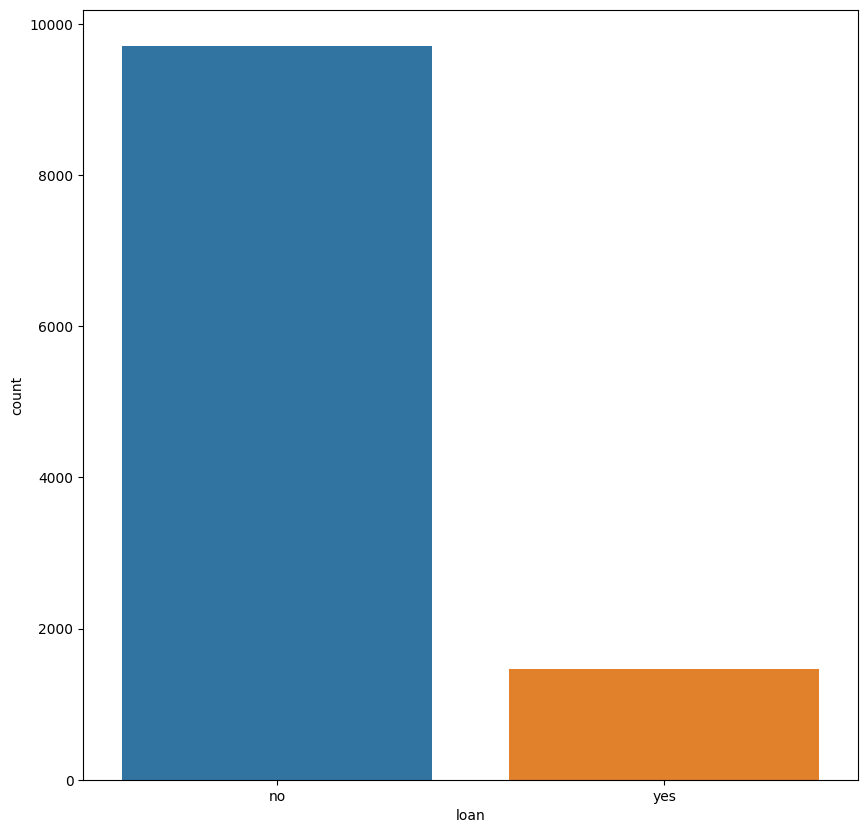

Contact


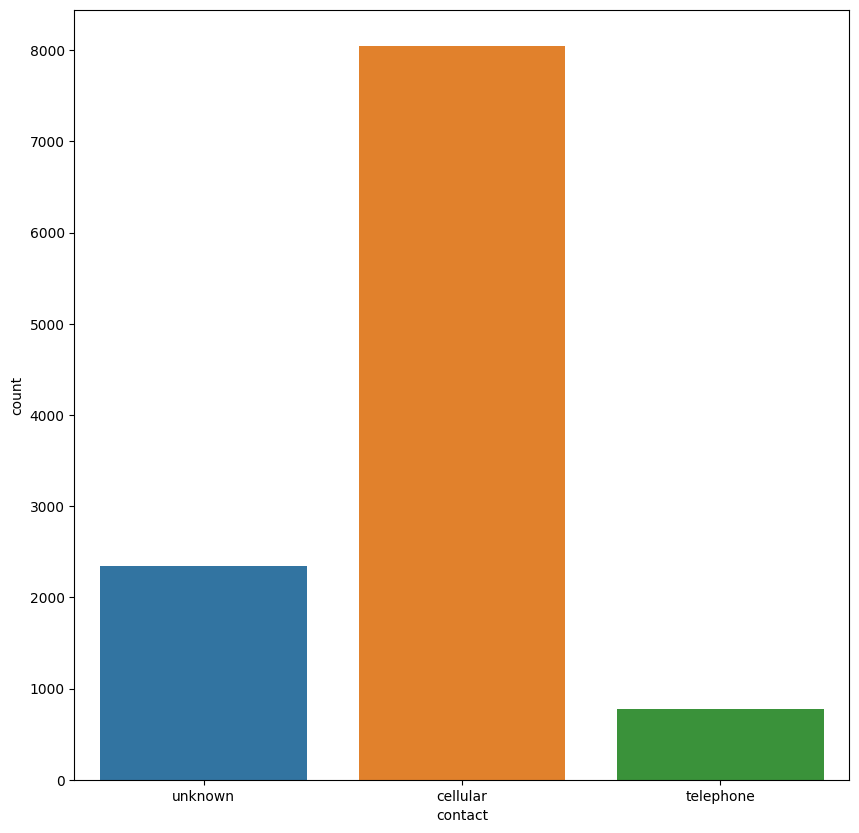

Month


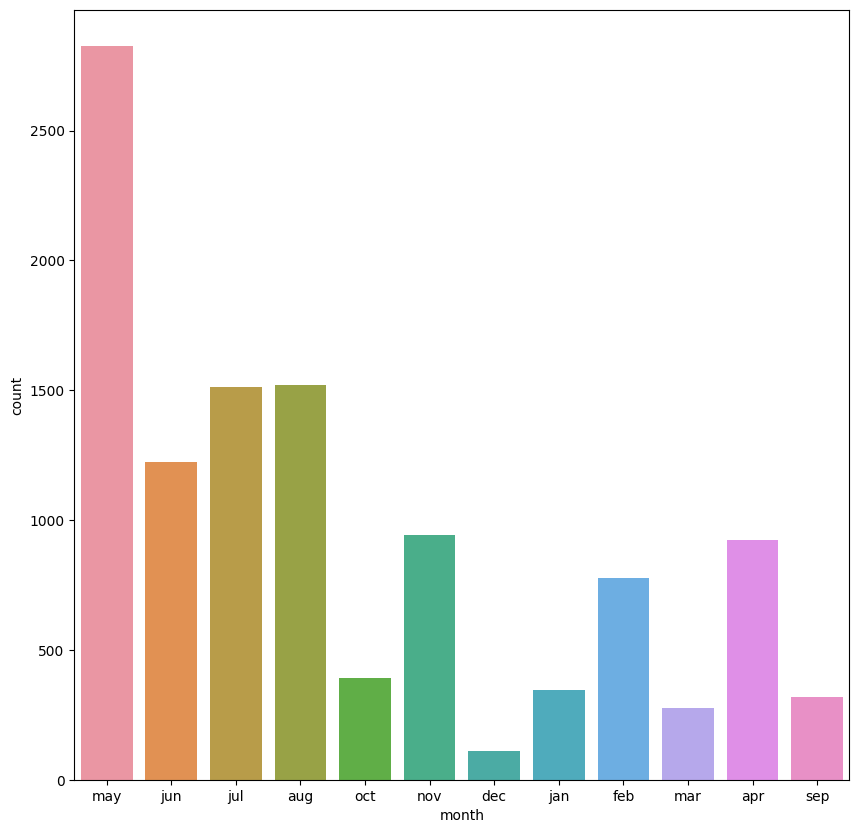

Poutcome


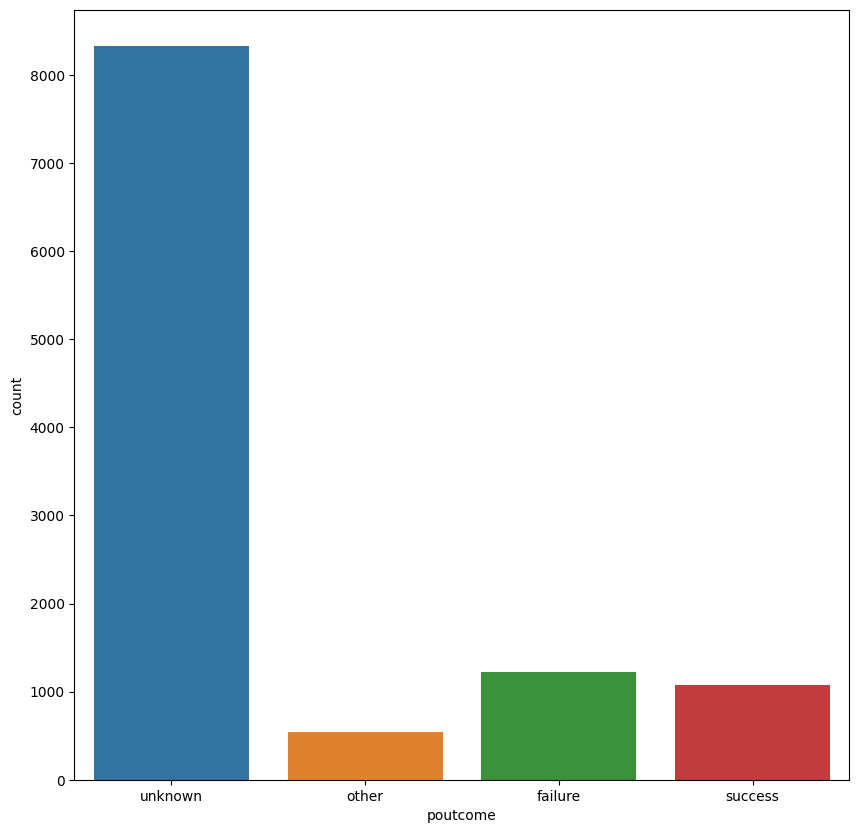

Deposit


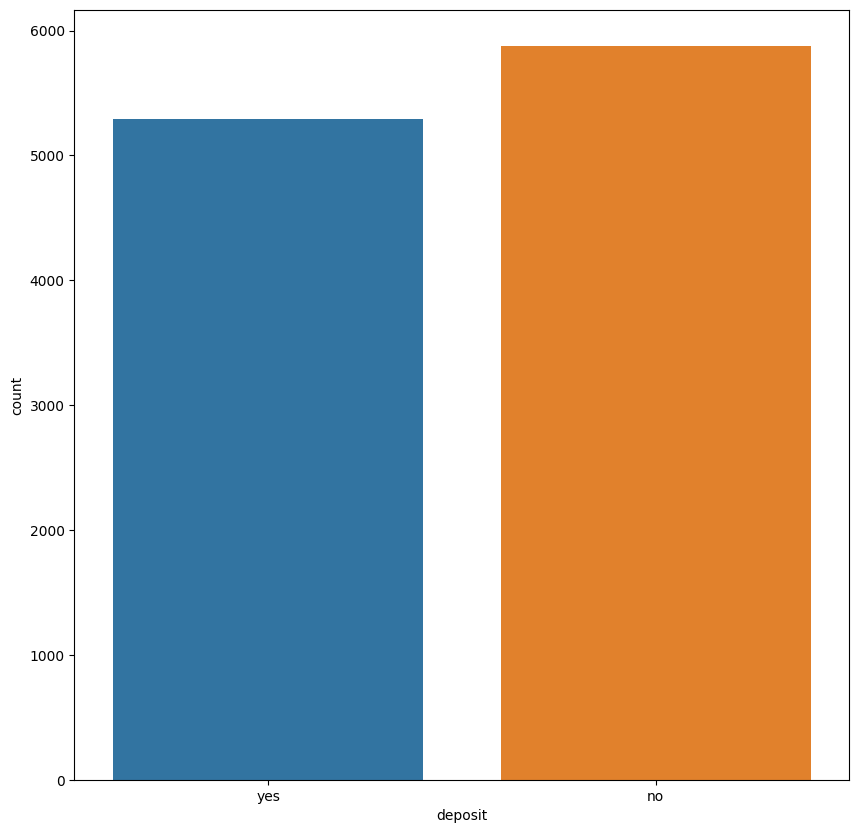

In [ ]:
for column in cat_col:
    plt.figure(figsize=(10, 10))
    print(column.title())
    ax = sns.countplot(x = df[column])
    plt.show()

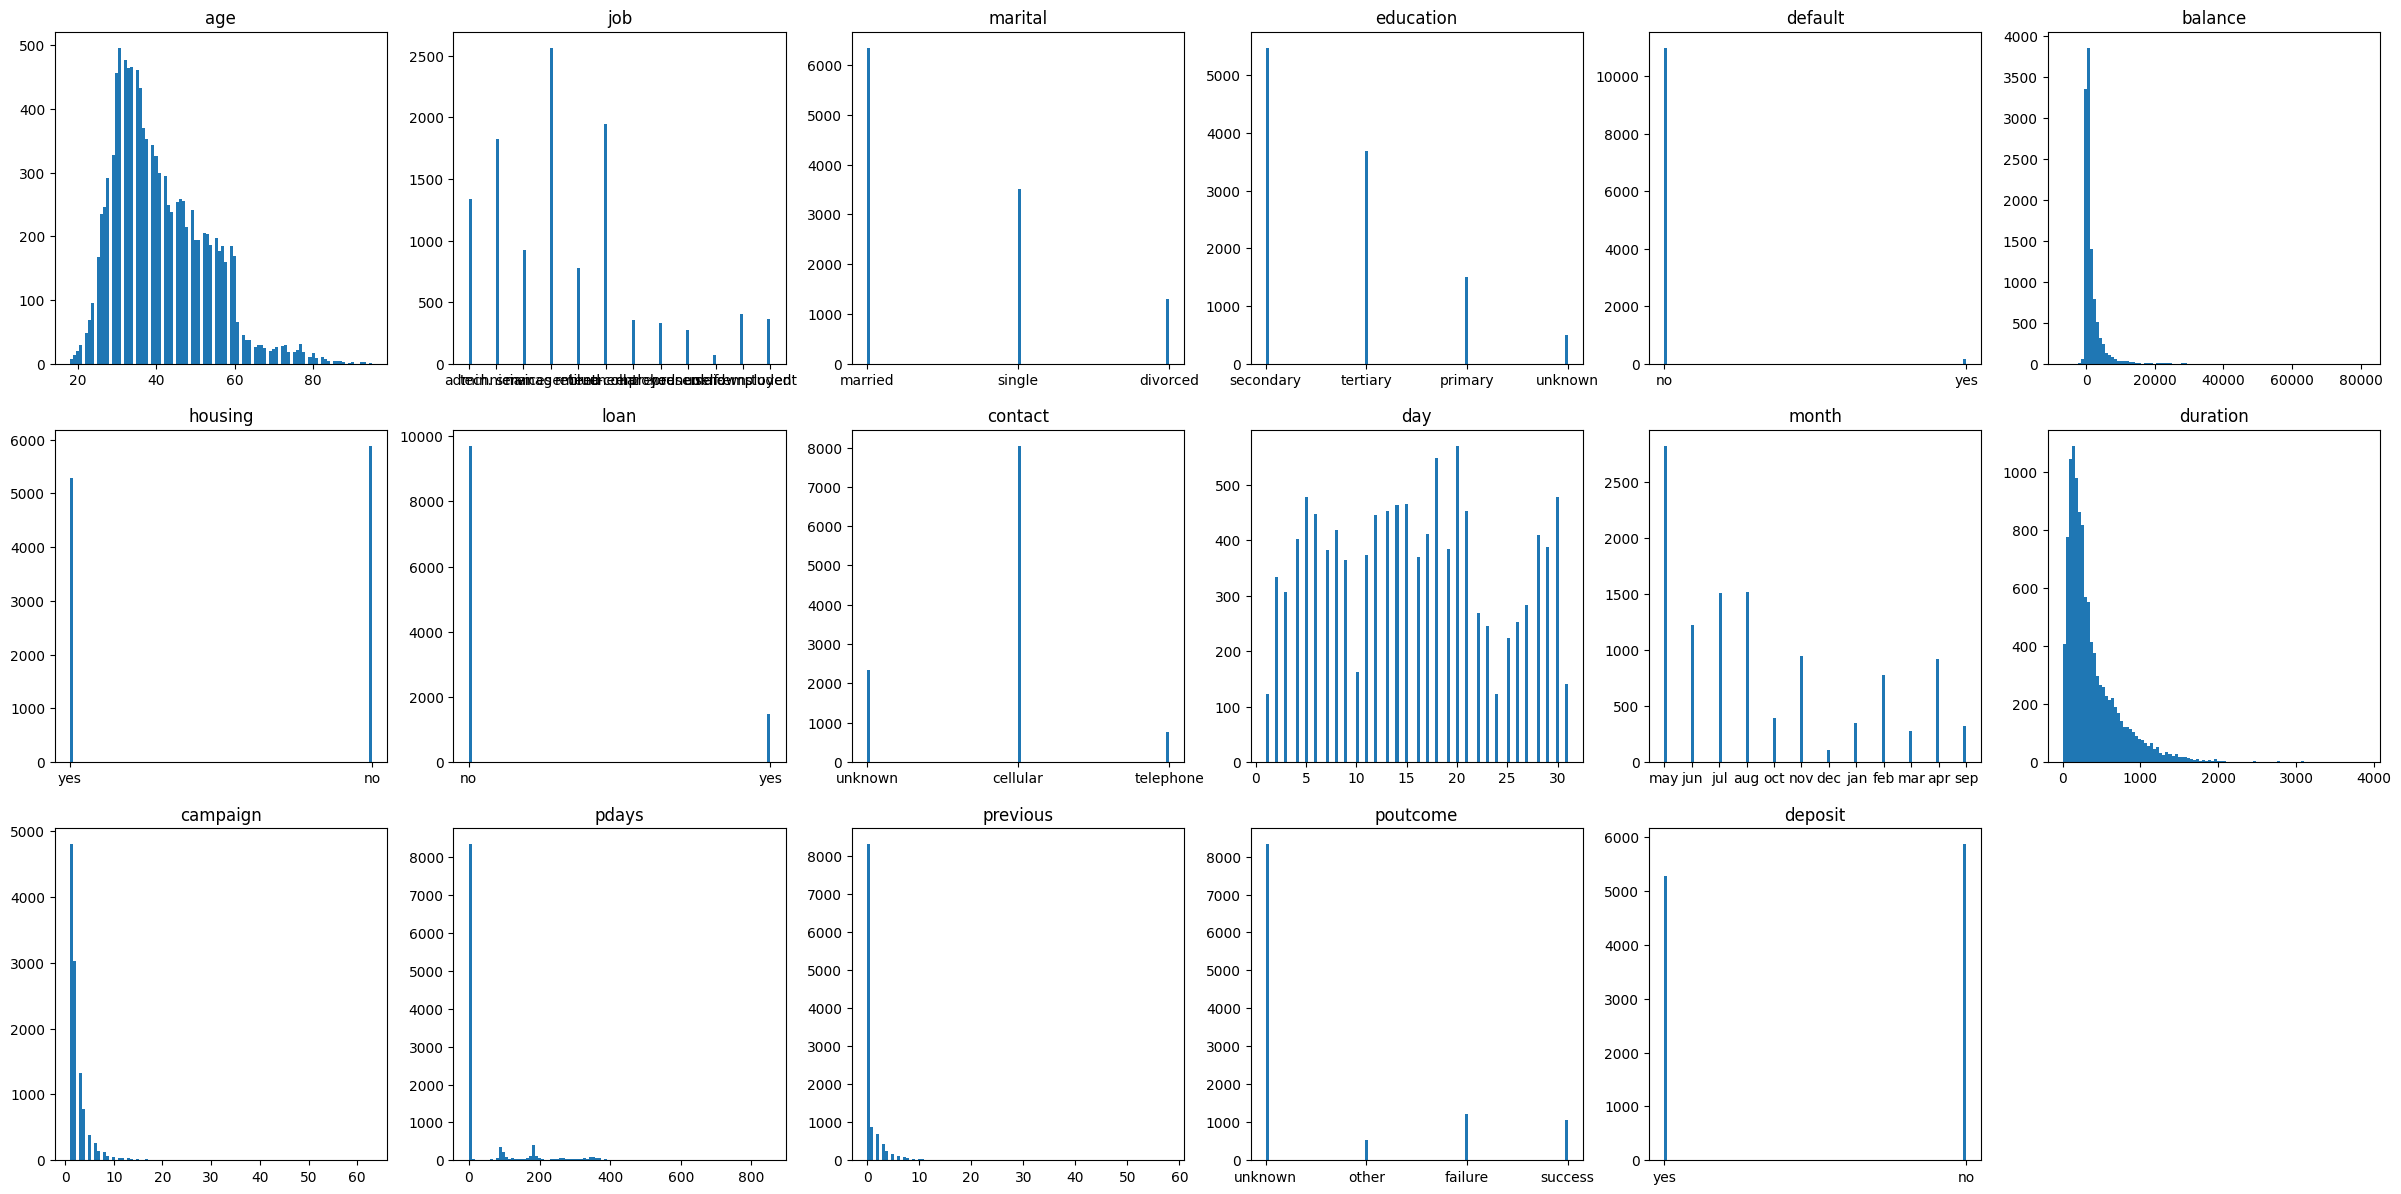

In [ ]:
# To visualize the distribution
figure = plt.figure(figsize=(30, 25))
for i in range(len(df.columns)):
    plt.subplot(5, 6, i+1)
    plt.hist(df[df.columns[i]], bins=100)
    plt.title(df.columns[i])
    
plt.show()

In [ ]:
le = preprocessing.LabelEncoder()
for i in cat_col:
  df[i]=le.fit_transform(df[i])

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [ ]:
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

<Axes: >

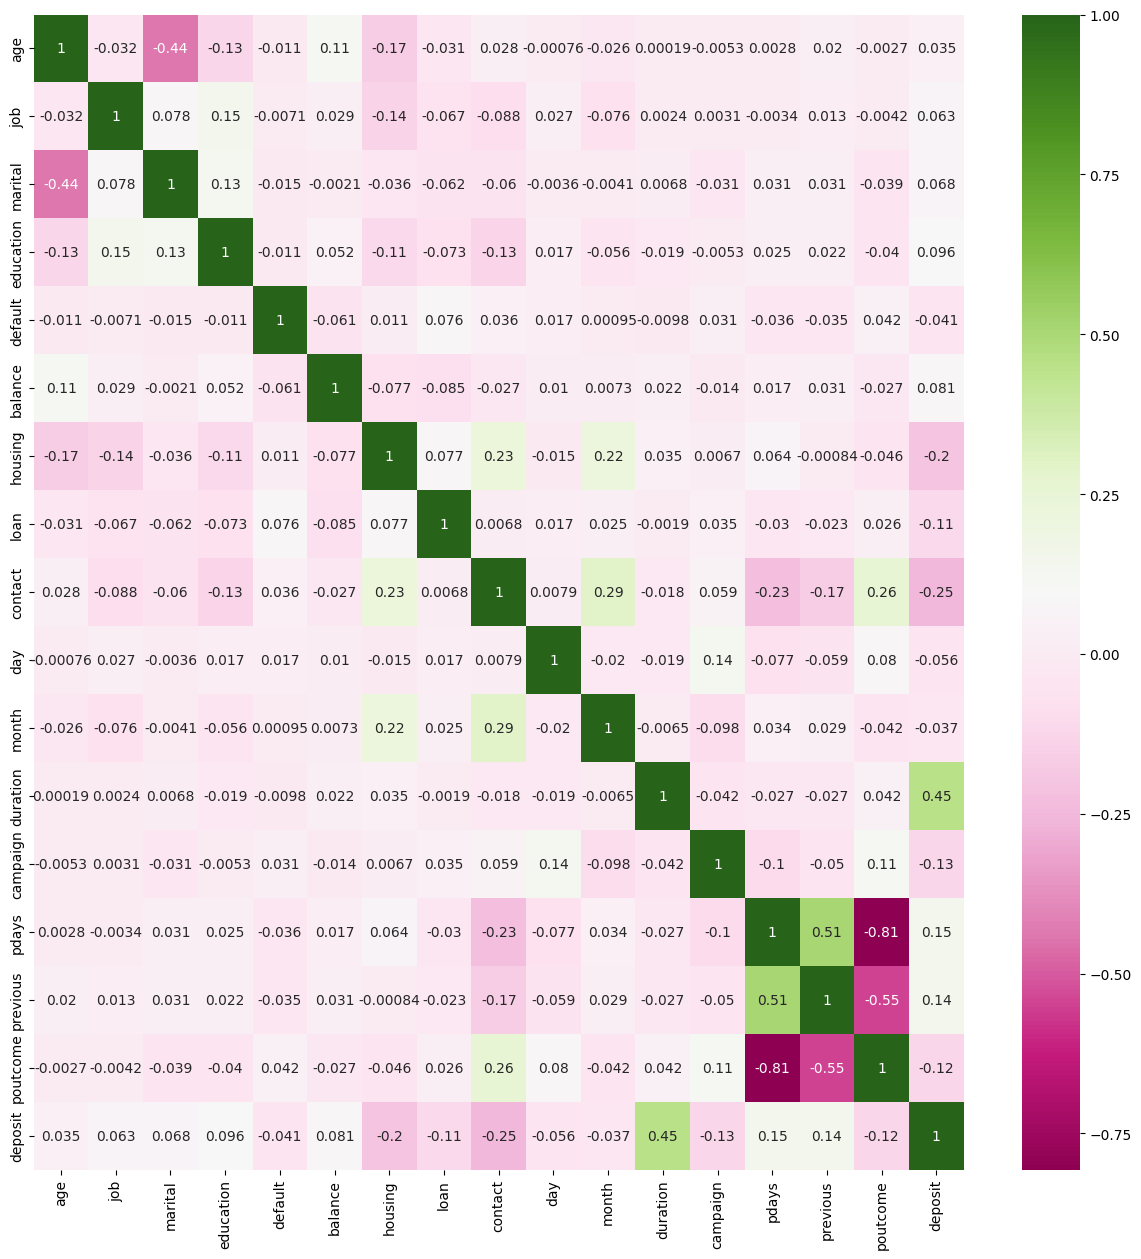

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='PiYG')


In [ ]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,1.000000,-0.031603,-0.442782,-0.126018,-0.011425,0.112300,-0.168700,-0.031418,0.027762,-0.000762,-0.026130,0.000189,-0.005278,0.002774,0.020169,-0.002699,0.034901
job,-0.031603,1.000000,0.078314,0.147046,-0.007066,0.028736,-0.136965,-0.067092,-0.087915,0.026589,-0.076011,0.002432,0.003104,-0.003385,0.012665,-0.004238,0.063395
marital,-0.442782,0.078314,1.000000,0.125845,-0.014691,-0.002138,-0.036345,-0.062029,-0.060456,-0.003642,-0.004070,0.006781,-0.030794,0.031200,0.031281,-0.039424,0.067610
education,-0.126018,0.147046,0.125845,1.000000,-0.010709,0.051728,-0.109168,-0.073154,-0.132540,0.016759,-0.055868,-0.019122,-0.005327,0.025165,0.022427,-0.040262,0.095948
default,-0.011425,-0.007066,-0.014691,-0.010709,1.000000,-0.060954,0.011076,0.076434,0.035709,0.017342,0.000950,-0.009760,0.030975,-0.036282,-0.035273,0.042357,-0.040680
balance,0.112300,0.028736,-0.002138,0.051728,-0.060954,1.000000,-0.077092,-0.084589,-0.027295,0.010467,0.007264,0.022436,-0.013894,0.017411,0.030805,-0.027151,0.081129
housing,-0.168700,-0.136965,-0.036345,-0.109168,0.011076,-0.077092,1.000000,0.076761,0.226392,-0.014770,0.219602,0.035051,0.006660,0.064497,-0.000840,-0.046370,-0.203888
loan,-0.031418,-0.067092,-0.062029,-0.073154,0.076434,-0.084589,0.076761,1.000000,0.006829,0.017269,0.025329,-0.001914,0.034722,-0.030416,-0.022668,0.026344,-0.110580
contact,0.027762,-0.087915,-0.060456,-0.132540,0.035709,-0.027295,0.226392,0.006829,1.000000,0.007943,0.289803,-0.018000,0.059258,-0.227785,-0.169919,0.257993,-0.249847
day,-0.000762,0.026589,-0.003642,0.016759,0.017342,0.010467,-0.014770,0.017269,0.007943,1.000000,-0.019840,-0.018511,0.137007,-0.077232,-0.058981,0.080221,-0.056326


In [ ]:
def correlate(ds,threshold):
  col_corr = set()
  cor_matrix = ds.corr()
  for i in range(len(cor_matrix.columns)):
    for j in range(i):
      if abs(cor_matrix.iloc[i,j]) > threshold:
        col_corr.add(cor_matrix.columns[i])
  return col_corr

In [ ]:
cor_features = correlate(df,0.85)
print(cor_features)


set()


In [ ]:
print(len(cor_features))

0


In [ ]:
var = VarianceThreshold(threshold = 0.1)
var.fit(df)
concol1 = [column for column in df.columns 
          if column not in df.columns[var.get_support()]]
df.drop(concol1,axis=1,inplace = True)


In [ ]:
print(concol1)

['default']


In [ ]:
df.drop(['contact'], axis = 1, inplace = True)

In [ ]:
df

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,2343,1,0,5,8,1042,1,-1,0,3,1
1,56,0,1,1,45,0,0,5,8,1467,1,-1,0,3,1
2,41,9,1,1,1270,1,0,5,8,1389,1,-1,0,3,1
3,55,7,1,1,2476,1,0,5,8,579,1,-1,0,3,1
4,54,0,1,2,184,0,0,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,1,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,733,0,0,16,6,83,4,-1,0,3,0
11159,32,9,2,1,29,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,1,8,8,9,2,172,5,0,0


In [ ]:
X = df.drop('deposit',axis = 1)

In [ ]:
X

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,2343,1,0,5,8,1042,1,-1,0,3
1,56,0,1,1,45,0,0,5,8,1467,1,-1,0,3
2,41,9,1,1,1270,1,0,5,8,1389,1,-1,0,3
3,55,7,1,1,2476,1,0,5,8,579,1,-1,0,3
4,54,0,1,2,184,0,0,5,8,673,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,1,0,20,0,257,1,-1,0,3
11158,39,7,1,1,733,0,0,16,6,83,4,-1,0,3
11159,32,9,2,1,29,0,0,19,1,156,2,-1,0,3
11160,43,9,1,1,0,0,1,8,8,9,2,172,5,0


In [ ]:
Y = df.deposit

In [ ]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state = 42)

In [ ]:
X_train.shape

(8929, 14)

In [ ]:
X_test.shape

(2233, 14)

In [ ]:
X_train

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
3955,28,8,2,2,5741,0,0,10,11,1042,5,200,3,0
11150,34,4,1,1,355,0,0,21,1,314,3,-1,0,3
5173,48,10,0,1,201,0,0,10,9,594,1,91,1,2
3017,53,2,1,2,1961,0,0,15,2,351,1,-1,0,3
2910,53,4,1,2,1624,0,0,11,9,166,3,97,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,47,4,1,2,761,1,0,11,5,80,2,-1,0,3
5191,28,6,2,2,159,0,0,16,9,449,2,33,4,2
5390,35,9,1,1,1144,0,0,20,1,197,13,-1,0,3
860,51,5,1,2,746,0,0,25,1,372,5,-1,0,3


In [ ]:
X_test

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
5527,65,5,0,1,744,0,0,5,5,182,1,-1,0,3
4541,38,1,1,1,1627,0,0,16,6,1323,9,-1,0,3
1964,35,1,2,1,4963,1,0,14,8,456,1,300,1,0
5007,47,1,1,1,8229,0,0,8,1,784,2,-1,0,3
8928,35,9,1,2,1473,1,0,12,8,84,3,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,46,10,1,1,926,0,0,7,5,385,5,-1,0,3
5544,49,9,1,0,230,1,0,8,8,96,1,-1,0,3
10749,53,9,1,2,431,1,0,5,8,55,1,328,1,0
3881,48,10,1,1,926,0,0,12,1,504,2,178,10,2


In [ ]:
Y_train.shape

(8929,)

In [ ]:
Y_test.shape

(2233,)

In [ ]:
Y_train

3955     1
11150    0
5173     1
3017     1
2910     1
        ..
5734     0
5191     1
5390     0
860      1
7270     0
Name: deposit, Length: 8929, dtype: int64

In [ ]:
Y_test

5527     0
4541     1
1964     1
5007     1
8928     0
        ..
376      1
5544     0
10749    0
3881     1
6786     0
Name: deposit, Length: 2233, dtype: int64

In [ ]:
Standardisation = preprocessing.StandardScaler()
x_train = Standardisation.fit_transform(X_train)
x_test = Standardisation.fit_transform(X_test)

In [ ]:
x_train

array([[-1.11404081,  1.09433902,  1.27746077, ...,  1.37403675,
         0.99172215, -2.4871858 ],
       [-0.60927832, -0.15089522, -0.32321945, ..., -0.47620856,
        -0.36760146,  0.51634166],
       [ 0.56850085,  1.71695614, -1.92389966, ...,  0.37066989,
         0.08550641, -0.48483416],
       ...,
       [-0.52515123,  1.40564758, -0.32321945, ..., -0.47620856,
        -0.36760146,  0.51634166],
       [ 0.8208821 ,  0.16041334, -0.32321945, ..., -0.47620856,
        -0.36760146,  0.51634166],
       [-0.94578665, -0.15089522,  1.27746077, ..., -0.47620856,
        -0.36760146,  0.51634166]])

In [ ]:
x_test

array([[ 1.98143576,  0.15244778, -1.89157941, ..., -0.50112687,
        -0.35262221,  0.538105  ],
       [-0.26549831, -1.06877513, -0.30065782, ..., -0.50112687,
        -0.35262221,  0.538105  ],
       [-0.51515765, -1.06877513,  1.29026377, ...,  2.2553867 ,
         0.03166544, -2.40696478],
       ...,
       [ 0.9827984 ,  1.37367069, -0.30065782, ...,  2.51180657,
         0.03166544, -2.40696478],
       [ 0.5666995 ,  1.67897642, -0.30065782, ...,  1.13812871,
         3.49025428, -0.44358493],
       [-0.59837743, -1.37408086, -0.30065782, ...,  4.27927208,
         0.41595309, -2.40696478]])

In [ ]:
#NaiveBayes
gnb = GaussianNB()
gnb.fit(x_train, Y_train) 
y_nbpred = gnb.predict(x_test)
accuracy1 = metrics.accuracy_score(Y_test, y_nbpred)*100
print(accuracy1)

75.14554411106135


In [ ]:
#Logistic Regression
lgr = LogisticRegression(random_state=100)
lgr.fit(x_train,Y_train)
Y_score = lgr.predict(x_test)
lr_probs = lgr.predict_proba(x_test)
accuracy2 = lgr.score(x_test, Y_test)*100
print(accuracy2)

77.33990147783251


In [ ]:
#KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, Y_train)
predictedlabels = knn.predict(x_test)
accuracy3 = accuracy_score(Y_test, predictedlabels)*100
print(accuracy3)

78.90729959695477


In [ ]:
# SVM
svc_model = SVC()
svc_model.fit(x_train, Y_train)
y_pred = svc_model.predict(x_test)
accuracy4 = (metrics.accuracy_score(Y_test,y_pred)*100)
print(accuracy4)

80.11643528884909


In [ ]:
#Random Forest
rf = RandomForestClassifier(n_estimators=120, random_state=42)
rf.fit(x_train, Y_train)
y_rfpred = rf.predict(x_test)
accuracy5 = accuracy_score(Y_test, y_rfpred)*100
accuracy5

82.5794894760412

In [ ]:
print(confusion_matrix(Y_test, y_rfpred))

[[938 228]
 [161 906]]


<Axes: title={'center': 'Comparision of Models'}, xlabel='Model'>

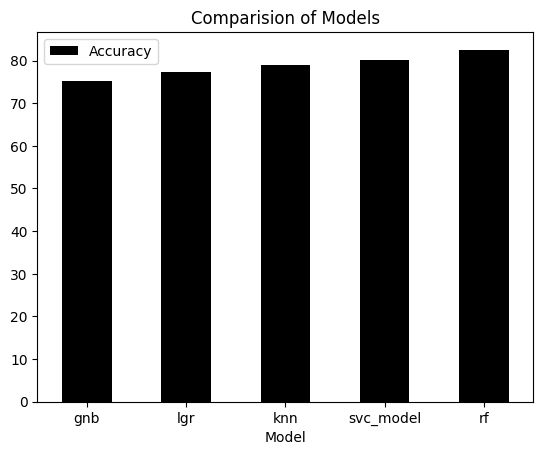

In [ ]:
info = [['gnb', 'lgr', 'knn', 'svc_model', 'rf'],[accuracy1,accuracy2,accuracy3,accuracy4, accuracy5]]
df = pd.DataFrame(columns=['Model', 'Accuracy'])
for i in range(5):
  df.loc[i] = [info[0][i],info[1][i]]
df.plot.bar(x="Model", y="Accuracy",title="Comparision of Models", color = 'black', rot = 0)

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gradio as gr

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def prediction(age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome):
  x=np.array([age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome])
  x =((x-X_train.mean())/(X_train.std()))
  outcome = rf.predict([x])
  if outcome==0:
    return "No"
  else:
    return "Yes"
output = gr.outputs.Textbox()
inputs = [
    gr.inputs.Number(label="Age"),
    gr.inputs.Number(label="Job"),
    gr.inputs.Number(label="Marital Status"),
    gr.inputs.Number(label="Education Level"),
    gr.inputs.Number(label="Balance"),
    gr.inputs.Number(label="Housing"),
    gr.inputs.Number(label="Loan"),
    gr.inputs.Number(label="Day"),
    gr.inputs.Number(label="Month"),
    gr.inputs.Number(label="Duration"),
    gr.inputs.Number(label="Number of Contacts Performed During This Campaign"),
    gr.inputs.Number(label="Days Since Last Contact from a Previous Campaign"),
    gr.inputs.Number(label="Number of Contacts Performed Before This Campaign"),
    gr.inputs.Number(label="Outcome of the Previous Marketing Campaign")
]
demo=gr.Interface(fn=prediction, inputs = inputs, outputs=output, title = "<center><h1>BANK MARKETING ANALYSIS</h1></center>",
                  description =  """<center>
                                    <img src="https://t3.ftcdn.net/jpg/03/55/89/04/360_F_355890479_DPOZJEMBwKWOojmVH0MYYMqm8j6Re05i.jpg",width="1000" height="400">
                                    </center>
                                    <h4><b>Choose job:</b></h4> admin = 0, technician = 9, services = 7, management = 4, retired = 5, blue-collar = 1, self-employed = 6, student = 8, unemployed = 10, entrepreneur = 2, housemaid = 3, unknown = 11<br>
                                    <h4><b>Choose marital:</b></h4> married = 1, single = 2, divorced = 0<br>
                                    <h4><b>Choose education:</b></h4> secondary = 1, tertiary = 2, primary = 0, unknown = 3<br>
                                    <h4><b>Choose housing:</b></h4> yes = 0, no = 1\nChoose loan : yes = 1, no = 0<br>
                                    <h4><b>Choose month:</b></h4> jan = 4, feb = 3, mar = 7, apr = 0, may = 8, jun = 6, jul = 5, aug = 1, sep = 11, oct = 10, nov = 9, dec = 2<br>
                                    <h4><b>Choose poutcome:</b></h4> unknown = 3, failure = 0, success = 2, other = 1""")
demo.launch(share = True) 

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e66ec5dfe1ac6b6403.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
